In [1]:
import sys
sys.path.append('..')

import numpy as np 
import pandas as pd 
from scipy.optimize import root

from mod.SimSale import SimSale
from mod.Demand import Demand
from numba import jit

from numdifftools import Hessian,Jacobian

## 1.模拟数据 及 待估计参数

In [26]:
sim_sale=SimSale(level_size=[3,3],seed=10)
sale_df = sim_sale.generate_sale(lam=1000,size=200,un_ava_frac=0.25,un_ava_mix=True)
# sale_df
print(sim_sale.attr_f_list[0])
print(sim_sale.attr_f_list[1])
print(sim_sale.attr_pi_list[0])
print(sim_sale.attr_pi_list[1]) 
mod = Demand(data=sale_df, 
             goods_attr={'A': list('abc'), 'B': list('abc')})
sale_df.reset_index(drop=True)

a    0.479890
b    0.104251
c    0.415859
Name: A, dtype: float64
a    0.267030
b    0.349371
c    0.383599
Name: B, dtype: float64
          a         b         c
a  1.000000  0.461524  0.122328
b  0.620133  1.000000  0.382958
c  0.861233  0.742800  1.000000
          a         b         c
a  1.000000  0.130495  0.671022
b  0.125416  1.000000  0.203503
c  0.767916  0.275686  1.000000


,A_a*B_a,A_a*B_b,A_a*B_c,A_b*B_a,A_b*B_b,A_b*B_c,A_c*B_a,A_c*B_b,A_c*B_c
0,NaN,165.0,270.0,118.0,38.0,41.0,NaN,139.0,159.0
1,127.0,NaN,187.0,NaN,110.0,54.0,126.0,146.0,144.0
2,213.0,168.0,192.0,57.0,42.0,NaN,NaN,151.0,155.0
3,242.0,303.0,NaN,28.0,46.0,41.0,112.0,NaN,168.0
4,147.0,151.0,214.0,NaN,38.0,NaN,124.0,127.0,133.0
...,...,...,...,...,...,...,...,...,...
195,123.0,290.0,206.0,48.0,36.0,NaN,121.0,NaN,167.0
196,113.0,171.0,334.0,53.0,35.0,NaN,124.0,154.0,NaN
197,130.0,185.0,319.0,31.0,NaN,25.0,98.0,132.0,NaN
198,122.0,175.0,192.0,NaN,NaN,54.0,124.0,164.0,151.0


## 2.参数估计

     fun: 328443.37817648705
 message: ['Maximum number of iteration reached']
    nfev: 79302
    nhev: 0
     nit: 1000
    njev: 2279
  status: 0
 success: True
       x: array([ 0.57511988, -0.93876651,  0.42336447, -0.30371031, -0.03785474,
        0.06263612, -0.20227532, -1.87430234, -0.57961592, -0.00387701,
        1.84427509,  1.18411411, -1.0681617 ,  0.59601297, -1.23595537,
       -2.02749372,  1.18411411, -1.65879967])
([array([0.4809423 , 0.10583284, 0.41322486]), array([0.26688006, 0.34815749, 0.38496245])], [array([0.44960289, 0.13304469, 0.35902098, 0.49903075, 0.86345353,
       0.76568673]), array([0.25575284, 0.64474361, 0.2251408 , 0.11634634, 0.76568673,
       0.15992319])])


0.9736333661070407

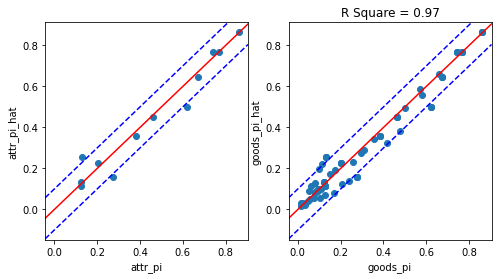

In [27]:
# method='dual_annealing'
mod.fit(method='dual_annealing',maxiter=1000)
print(mod.theta_hat)
print(mod.init_theta(mod.theta_hat.x,to_goods=False))

mod.score(SimSale=sim_sale,plot=True)

In [16]:
mod.attr_trans

[      A_a   A_b
 A_a   NaN  79.0
 A_b  80.0   NaN,
       B_a   B_b
 B_a   NaN  81.0
 B_b  88.0   NaN]

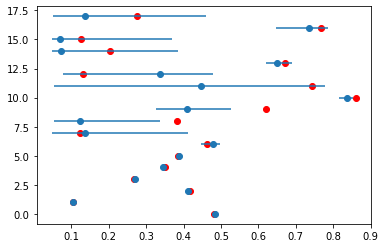

In [28]:
a,b,c=mod.conf_int(SimSale=sim_sale,bootstrap_n=20)

In [ ]:
level = 0.95
theta_matrix = np.column_stack(c)

int_up       = np.quantile(theta_matrix,q=level+(1-level)/2,axis=1)
int_up       = mod.init_theta(int_up,to_goods=False)
int_up       = np.append(np.concatenate(int_up[0]),np.concatenate(int_up[1]))

int_dw       = np.quantile(theta_matrix,q=(1-level)/2,axis=1)
int_dw       = mod.init_theta(int_dw,to_goods=False)
int_dw       = np.append(np.concatenate(int_dw[0]),np.concatenate(int_dw[1]))

int_md       = np.quantile(theta_matrix,q=0.5,axis=1)
int_md       = mod.init_theta(int_md,to_goods=False)
int_md       = np.append(np.concatenate(int_md[0]),np.concatenate(int_md[1]))

In [ ]:
int_dw

In [ ]:
c